
# 타이타닉 데이터 EDA & 전처리


## 0.도메인 살펴보기 
1. 개요
* 1912년 타이타닉호 침몰 사고 당시 탑승객들의 생존 여부 데이터


2. 데이터 변수 설명
* 'PassengerId' : 승객 고유 번호  
* 'Survived' : 생존 여부 (0 = 사망, 1 = 생존)  
* 'Pclass' : 선실 등급 (1 = 1등석, 2 = 2등석, 3 = 3등석)  
* 'Name' : 이름  
* 'Sex' : 성별  
* 'Age' : 나이  
* 'SibSp' : 함께 탑승한 형제자매/배우자 수  
* 'Parch' : 함께 탑승한 부모/자녀 수  
* 'Ticket' : 티켓 번호  
* 'Fare' : 요금  
* 'Cabin' : 객실 번호  
* 'Embarked' : 탑승 항구 (C = Cherbourg, Q = Queenstown, S = Southampton)

## 1. 가설 세우기
- 남성보다 여성의 생존률이 높을 것이다.
- 나이에 따라 생존률이 다를 것이다.
- 선실 등급이 높을수록 생존률이 높아질 것이다.
- 함께 탑승한 가족의 수에 따라 생존률이 달라질 수 있다.

## 2. 라이브러리 로드 & 한글폰트 설정
pandas : 데이터 분석 라이브러리  
numpy : 다양한 계산과 분석 라이브러리  
matplotlib : 시각화 도구 제공  
seaborn : 더 정돈된 시각화 도구

In [2]:
# 데이터 분석 및 시각화 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#한글 폰트를 위한 라이브러리
import koreanize_matplotlib

## 3.데이터 불러오기

### 데이터 살펴보기
- 총 : 891개의 데이터
- 주요 항목 : 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch' 등

In [10]:
# 현재 파일 위치 확인하기
%pwd

'c:\\Users\\gahee\\OneDrive\\바탕 화면\\학교\\BAF'

In [5]:
# 절대 경로로 불러오기
titanic = pd.read_csv("C:/BAF/Titanic-Dataset.csv")

In [12]:
# 상대 경로를 이용한 데이터 불러오기
titanic2 = pd.read_csv('Titanic-Dataset.csv',encoding='cp949')


In [15]:
# 같은지 확인
titanic.equals(titanic2)

True

In [18]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# 열 확인
print(titanic.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
# 데이터 크기
titanic.shape

(891, 12)

## 4. EDA
### 목적  
- 데이터의 개형 살펴보기
- 간단한 인사이트 얻기
- 전처리를 위한 준비

### 4-1 데이터 살펴보기
**'PassengerId'** : 승객 고유 번호  
**'Survived'** : 생존 여부 (0 = 사망, 1 = 생존)  
**'Pclass'** : 선실 등급 (1 = 1등석, 2 = 2등석, 3 = 3등석)  
**'Name'** : 이름  
**'Sex'** : 성별  
**'Age'** : 나이  
**'SibSp'** : 함께 탑승한 형제자매/배우자 수  
**'Parch'** : 함께 탑승한 부모/자녀 수  
**'Ticket'** : 티켓 번호  
**'Fare'** : 요금  
**'Cabin'** : 객실 번호  
**'Embarked'** : 탑승 항구 (C = Cherbourg, Q = Queenstown, S = Southampton)

In [20]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [21]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 4-2 결측치 및 중복 데이터 확인

In [ ]:
#결측치 개수 오름차순 정렬
titanic.isna().sum(axis=0).sort_values()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64

<Axes: >

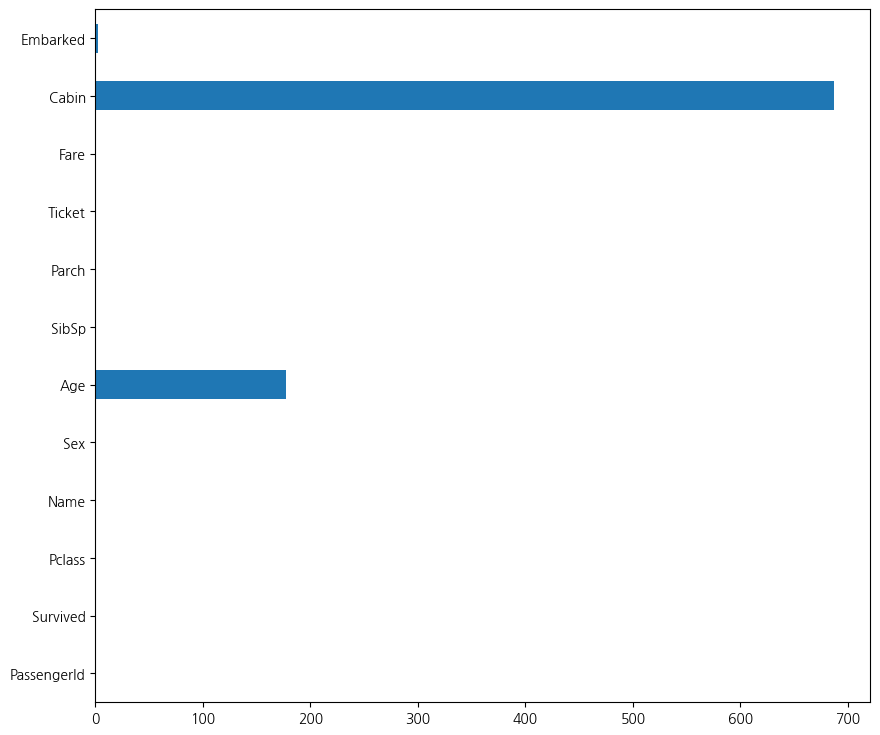

In [42]:
#결측치 시각화
missing = titanic.isna().sum(axis=0).sort_values()
titanic.isnull().sum().plot.barh(figsize=(10, 9))
#cabin에 가장 결측치가 많음

In [33]:
# 중복행 확인
titanic[titanic.duplicated()] # 중복행 없음

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### 4-3. 변수별로 특징 살펴보기
1. 연령대별 생존률 시각화
2. 성별과 생존률 간의 관계 
3. 함께 탑승한 형제자매/배우자 수, 함께 탑승한 부모/자녀 수와 생존률과의 관계
4. 가족의 수와 생존률의 관계

In [6]:
#원본 데이터 카피하기
tt = titanic.copy()
tt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Age 결측값 제거
tt['Age']
tt_age = tt[~tt['Age'].isna()]
# sns.countplot(data=tt['Survived'], x= 'Age')
tt['Survived']


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
# 생존 여부 결측치 확인
tt[tt['Survived'].isna()] #없음

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
# 나이의 범위 확인
print(tt_age['Age'].min(), tt_age['Age'].max())


0.42 80.0


In [77]:
# 그룹화
group_age = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels_age = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
tt_age['AgeGroup'] = pd.cut(tt_age['Age'], bins=group_age, labels=labels_age)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_18708\1115180163.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tt_age['AgeGroup'] = pd.cut(tt_age['Age'], bins=group_age, labels=labels_age)


In [78]:
# 그룹 빈도 확인
tt_age['AgeGroup'].value_counts()

AgeGroup
20-30    230
30-40    155
10-20    115
40-50     86
0-10      64
50-60     42
60-70     17
70-80      5
Name: count, dtype: int64

**Age & Sex & Survived**
- 연령대 별 생존률에 차이가 있을 것이다.
- 70대의 생존률이 가장 낮고, 20대의 생존률이 가장 높을 것이다
- 여성의 생존률이 남성의 생존률보다 높을 것이다.

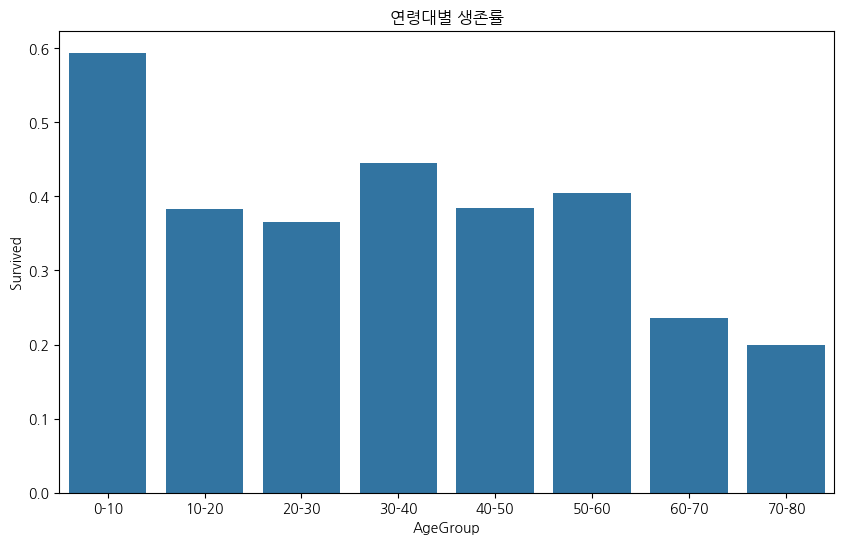

In [90]:
plt.figure(figsize=(10, 6))
sns.barplot(x="AgeGroup", y="Survived", data=tt_age, errorbar=None)
plt.title("연령대별 생존률")
plt.show()

In [84]:
# 성별 결측치 확인
tt[tt['Sex'].isna()] #없음
tt_age

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,30-40
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,20-30
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,10-20
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,20-30


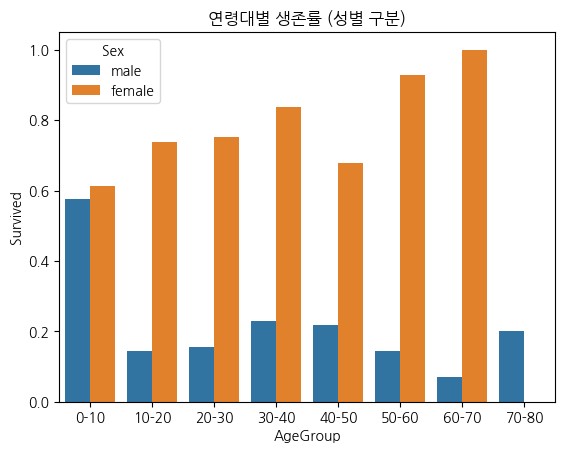

In [88]:
# 성별에 따른 연령대별 생존률 비교
sns.barplot(x='AgeGroup', y='Survived', hue='Sex', data=tt_age, errorbar=None)
plt.title("연령대별 생존률 (성별 구분)")
plt.show()

**SibSp & Parch & Survived**
- 가족의 수에 따라 생존률에 차이를 보일 것이다

**가족 수 관련 변수**
* 'SibSp' : 함께 탑승한 형제자매/배우자 수  
* 'Parch' : 함께 탑승한 부모/자녀 수  

In [96]:
#데이터 확인
tt['SibSp'].value_counts()
tt['Parch'].value_counts()


Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [95]:
#결측치 확인
tt[tt['SibSp'].isna()] #없음
tt[tt['Parch'].isna()] #없음

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<Axes: xlabel='Parch', ylabel='Survived'>

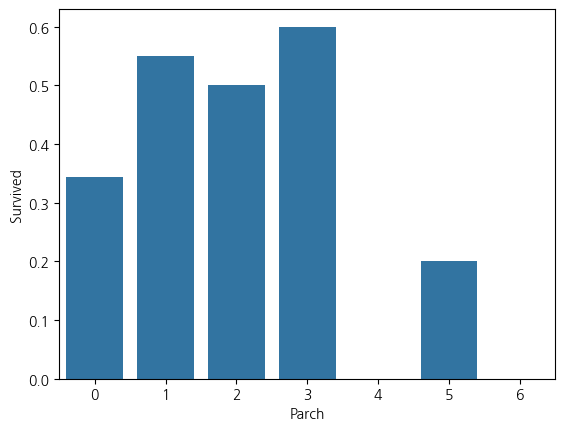

In [8]:
sns.barplot(x='Parch', y='Survived', data = tt, errorbar=None)

<Axes: xlabel='SibSp', ylabel='Survived'>

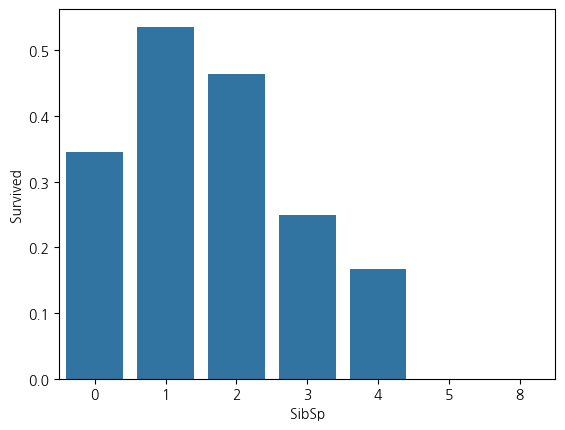

In [9]:
sns.barplot(x='SibSp', y='Survived', data = tt, errorbar=None)

In [11]:
tt['family'] = tt['SibSp'] + tt['Parch']
tt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


<Axes: xlabel='family', ylabel='Survived'>

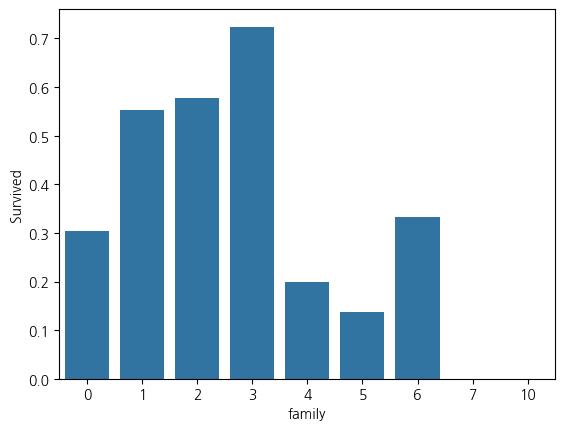

In [12]:
sns.barplot(x='family', y='Survived', data = tt, errorbar=None)

# 추가 아이디어
- 탑승 항구(Embarked)별 생존률

# 관심있는 주제
1. 인터넷 데이터로 사회 현상 분석하기  
https://www.kaggle.com/datasets/shakhoyatshujon/reddit-break-up-stories-dataset-20232025 (Reddit 이별 스토리 데이터 세트(2023–2025))

2. 주가 관련 뉴스 데이터 분석해 주가의 변동폭 구하기  
https://www.kaggle.com/datasets/park123/korean-news-title-datafrom-naver-stock (한국 주식시장 뉴스 타이틀 데이터(KOSPI))

